# [RQ1] Who wants to be a Champion?


### Create a plot where each point (x,y) represents the number of points obtained by team x at game week y.
For this task, we need the dataframes matches and teams.
In this exploratory data analysis (RQ1 - RQ5), we will use only the datasets relative to the Premier League season 2017/2018.

In [3]:
#I import the necessary libraries to organize data and plot the Premier League ranking 2017/2018.
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

We load the 'matches_England' and 'teams' json files, and produce the pandas dataframe

In [9]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Matches\matches_England.json', 'r') as file:
    data = file.read()
matches = json.loads(data)
matches = pd.DataFrame(matches)
matches.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Burnley - AFC Bournemouth, 1 - 2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",Turf Moor,1659,2500089
1,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Crystal Palace - West Bromwich Albion, 2 - 0","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",Selhurst Park,1628,2500090
2,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Huddersfield Town - Arsenal, 0 - 1","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The John Smith's Stadium,1609,2500091
3,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Liverpool - Brighton & Hove Albion, 4 - 0","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",Anfield,1612,2500092
4,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Manchester United - Watford, 1 - 0","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",Old Trafford,1611,2500093


In [11]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\teams.json', 'r') as teams:
    data = teams.read()
teams = json.loads(data)
teams = pd.DataFrame(teams)
teams.head()

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
3,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
4,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695


#### Create a dataframe of all the Premier League teams
We will produce a new dataframe 'english' from 'teams' to get rid of all the useless information, keeping only the rows with area tag {'name': 'England'}

In [32]:
english = teams[teams['area'] == {"name": "England", "id": "0", "alpha3code": "XEN", "alpha2code": ""}]
english.head()

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
8,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673
26,"{'name': 'England', 'id': '0', 'alpha3code': '...","Bournemouth, Dorset",AFC Bournemouth,AFC Bournemouth,club,1659
27,"{'name': 'England', 'id': '0', 'alpha3code': '...","Brighton, East Sussex",Brighton & Hove Albion,Brighton & Hove Albion FC,club,1651
39,"{'name': 'England', 'id': '0', 'alpha3code': '...","Burnley, Lancashire",Burnley,Burnley FC,club,1646


In [33]:
len(english.index) #Counting the rows

19

Here we notice that the teams are only 19, instead of 20, which means that there must be another Premier League team with a different area tag.

In fact, looking at the official list of English teams, we notice that Swansea City is missing.

In [13]:
# We search for a team with 'name' value 'Swansea City'
sw = teams.loc[teams['name'] == 'Swansea City']
sw

,area,city,name,officialName,type,wyId
19,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",Swansea,Swansea City,Swansea City AFC,club,10531


There it is. So we can add it to our english dataframe.

In [14]:
english = english.append(sw)
english

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
8,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673
26,"{'name': 'England', 'id': '0', 'alpha3code': '...","Bournemouth, Dorset",AFC Bournemouth,AFC Bournemouth,club,1659
27,"{'name': 'England', 'id': '0', 'alpha3code': '...","Brighton, East Sussex",Brighton & Hove Albion,Brighton & Hove Albion FC,club,1651
39,"{'name': 'England', 'id': '0', 'alpha3code': '...","Burnley, Lancashire",Burnley,Burnley FC,club,1646
54,"{'name': 'England', 'id': '0', 'alpha3code': '...",Leicester,Leicester City,Leicester City FC,club,1631
55,"{'name': 'England', 'id': '0', 'alpha3code': '...",London,West Ham United,West Ham United FC,club,1633
56,"{'name': 'England', 'id': '0', 'alpha3code': '...",Stoke-on-Trent,Stoke City,Stoke City FC,club,1639
60,"{'name': 'England', 'id': '0', 'alpha3code': '...",Watford,Watford,Watford FC,club,1644
65,"{'name': 'England', 'id': '0', 'alpha3code': '...",Liverpool,Everton,Everton FC,club,1623


We create a dataframe with only the columns 'name' and 'wyId', that are what we need to complete our task.

In [31]:
Engteam = pd.DataFrame(english['name'])
Engteam['code'] = english['wyId']
Engteam = Engteam.sort_values('code') #sorting values by 'code'
Engteam = Engteam.reset_index(drop=True) #reindexing

Engteam.head()

,name,code
0,Arsenal,1609
1,Chelsea,1610
2,Manchester United,1611
3,Liverpool,1612
4,Newcastle United,1613


From the dataframe 'matches' we only need the 'gameweek' and 'winner' columns, so we create the Premier dataframe.

In [28]:
Premier = pd.DataFrame(matches['gameweek'])
Premier['winner'] = matches['winner']
Premier['result'] = matches['label']
Premier = Premier.sort_values('gameweek')
Premier = Premier.reset_index(drop=True)

Premier[:8]

,gameweek,winner,result
0,1,1609,"Arsenal - Leicester City, 4 - 3"
1,1,1611,"Manchester United - West Ham United, 4 - 0"
2,1,1624,"Newcastle United - Tottenham Hotspur, 0 - 2"
3,1,1625,"Brighton & Hove Albion - Manchester City, 0 - 2"
4,1,1646,"Chelsea - Burnley, 2 - 3"
5,1,0,"Watford - Liverpool, 3 - 3"
6,1,1623,"Everton - Stoke City, 1 - 0"
7,1,0,"Southampton - Swansea City, 0 - 0"


So in the 'gameweek' column we can see the week where the match was disputed, and in 'winner' the wyId code of the winning team. It's worth of notice that if there's a draw the code value is 0.

#### Creating the ranking with all the points of each team during the 38 weeks of the season.

We start by adding 38 week columns to the Engteam dataframe.

In [23]:
for i in range(1,39):
    Engteam['week {}'.format(i)] = 0
Engteam.head()

,name,code,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,...,week 29,week 30,week 31,week 32,week 33,week 34,week 35,week 36,week 37,week 38
0,Arsenal,1609,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chelsea,1610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Manchester United,1611,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Liverpool,1612,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Newcastle United,1613,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Creating copy dataframes to avoid damaging the original ones
E = Engteam.copy()
P = Premier.copy()

Now we are ready to complete the E dataframe with all the results.

In [30]:
for i in range(380): #There are 380 total matches in the league.
    if P['winner'][i] != 0: #If there is not a draw
        
        #Adding 3 as value if the wyId code is the same as the 'winner' code in P
        E.loc[E['code'] == P['winner'][i], ['week {}'.format(P['gameweek'][i])]] = 3
        
    else:
        for j in range(20):
            
            if E['name'][j] in P['result'][i]:#If the team name is in the 'result' value
                E.at[j, 'week {}'.format(P['gameweek'][i])] = 1
E

,name,code,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,...,week 29,week 30,week 31,week 32,week 33,week 34,week 35,week 36,week 37,week 38
0,Arsenal,1609,3,0,0,3,1,3,3,0,...,0,3,0,3,3,0,3,0,3,3
1,Chelsea,1610,0,3,3,3,1,3,0,0,...,0,3,3,0,1,3,1,3,3,0
2,Manchester United,1611,3,3,3,1,3,3,3,1,...,3,3,1,3,3,0,3,3,0,3
3,Liverpool,1612,1,3,3,0,1,3,1,1,...,3,0,3,3,1,3,1,1,0,3
4,Newcastle United,1613,0,0,3,3,3,0,1,1,...,0,3,0,3,3,3,0,0,0,3
5,Southampton,1619,1,3,1,0,3,0,0,1,...,1,0,3,0,0,0,1,3,1,0
6,Everton,1623,3,1,0,0,0,3,0,1,...,0,1,3,0,1,1,3,3,1,0
7,Tottenham Hotspur,1624,3,0,1,3,1,3,3,3,...,3,3,3,3,3,0,1,3,0,3
8,Manchester City,1625,3,1,3,3,3,3,3,3,...,3,3,3,3,0,3,3,3,1,3
9,West Bromwich Albion,1627,3,3,1,0,1,0,1,1,...,0,0,0,0,1,3,1,3,3,0


#### Creating the plot

In [36]:
E = E.loc[:, 'week 1':] #we remove the 'names' and 'code' columns, we don't need them anymore


Now, we need to list of the result of each team so that we can sum them and plot the summed result of each team.

In [46]:
Graf = E.values.tolist()
Grafv = list(Graf)


In [47]:
for i in range(20):
    for j in range(1,38):
        Grafv[i][j] = Graf[i][j-1] + Graf[i][j] #Summing every week result with the past ones


We can finally plot. 

In [48]:
w = []
for i in range(1,39):
    w.append('{}'.format(i)) # x ticks of every week

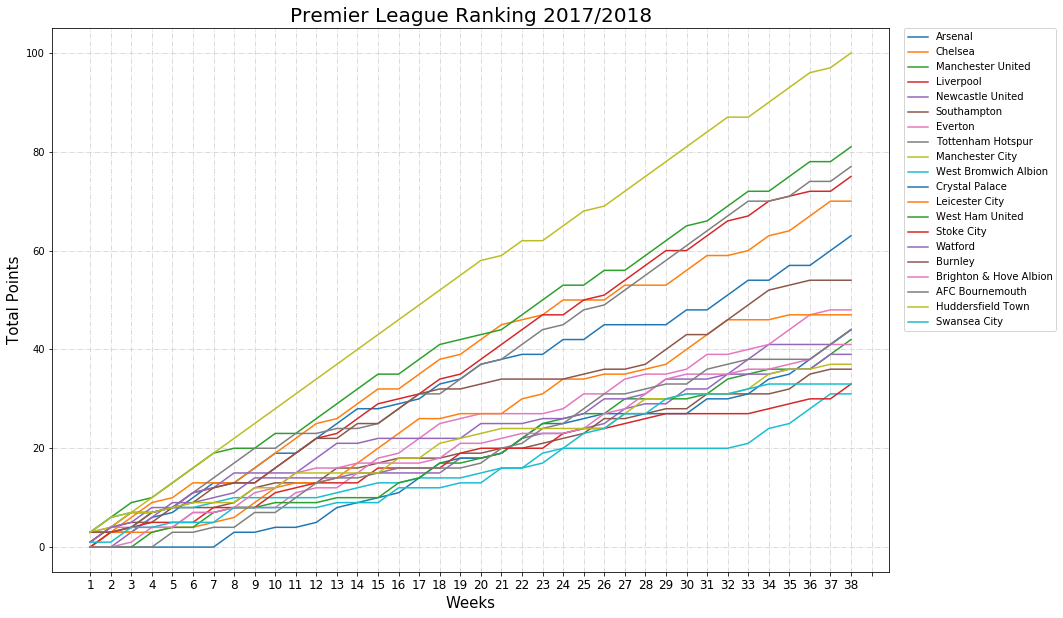

In [49]:
plt.rcParams["figure.figsize"] = [15, 10]

for i in range(20):
    plt.plot(Grafv[i], label = Engteam['name'][i])
    
plt.xticks(range(0,39),w, size = 12)
plt.ylabel("Total Points", size = 15)
plt.xlabel("Weeks", size = 15)
plt.grid(color ='lightgray', linestyle = '-.')
plt.title('Premier League Ranking 2017/2018', size = 20)

plt.legend(loc='center right',bbox_to_anchor=(1.20,0.7211), borderaxespad=0,prop={'size': 10});

#### Finding the two best and worst teams

We now define a function to find the teams with most consecutive wins and losses. 

In [57]:
def bestornot(n):
    r = E.values.tolist()
    for i in range(len(r)):
        r[i] = [str(x) if x == n else ' ' for x in r[i]] #everything different from n becomes a space ' '
        r[i] = ''.join(r[i])#getting rid of spaces
        r[i] = r[i].split()#creating the list r[i] modified
        r[i] = max(r[i])#choosing the max value in r[i]
    
    return r


In [58]:
bestornot(3)#most consecutive wins for team in the season

['333',
 '3333',
 '3333',
 '3333',
 '333',
 '3',
 '33',
 '3333333',
 '333333333333333333',
 '33',
 '333',
 '3333',
 '33',
 '3',
 '33',
 '333',
 '33',
 '33',
 '33',
 '33']

In [59]:
Engteam.at[8, 'name']#best team

'Manchester City'

In [60]:
Engteam.at[7, 'name']#second best

'Tottenham Hotspur'

Now, we can do the same with losses:

In [61]:
bestornot(0)#most consecutive losses for team in the season

['000',
 '00',
 '0',
 '0',
 '0000',
 '000',
 '000',
 '0',
 '0',
 '00000000',
 '0000000',
 '000',
 '000',
 '0000',
 '0000',
 '000',
 '000',
 '0000',
 '00000',
 '0000']

In [62]:
Engteam.at[9,'name']#worst team

'West Bromwich Albion'

In [63]:
Engteam.at[10,'name']#second worst

'Crystal Palace'